# Background and Scope
Hurricane Harvey had a great impact and resulted in a lot of damage cost to the country. Let's find out the most
affected areas.

## Import the Data
Let us import dataset for the events held in 2017 and filter out the events with no data about property cost.

In [25]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as  plt
import geoplot
import geopandas
import plotly.graph_objects as go

In [3]:
df = pd.read_csv('StormEvents_2017_finalProject.csv')
df.dropna(subset='Property_Cost', inplace=True)
df.head()

,EpisodeID,Event_ID,State,Year,Month,Event_Type,CZ_Name,Begin_Date_Time,Timezone,End_Date_Time,...,Damage_Property,Property_Cost,Damage_Crops,Crop_Cost,Begin_Lat,Begin_Lon,End_Lat,End_Lon,Episode_Narrative,Event_Narrative
1,113459,679228,FLORIDA,2017,April,Tornado,LEE,2017-04-06 09:30:00,EST-5,2017-04-06 09:40:00,...,110.00K,110000.0,0.00K,0.0,26.5010,-81.9980,26.5339,-81.8836,A line of thunderstorms developed along a pref...,Emergency management reported and broadcast me...
2,113448,679268,OHIO,2017,April,Thunderstorm Wind,GREENE,2017-04-05 17:49:00,EST-5,2017-04-05 17:53:00,...,1.00K,1000.0,0.00K,0.0,39.8500,-83.9900,39.8500,-83.9900,Showers and thunderstorms developed ahead of a...,An entire tree was uprooted in a yard on Dayto...
3,113697,682042,OHIO,2017,April,Flood,CLERMONT,2017-04-16 17:59:00,EST-5,2017-04-16 19:00:00,...,5.00K,5000.0,0.00K,0.0,39.1065,-84.2875,39.1061,-84.2874,Thunderstorms with very heavy rain developed a...,Garage of a home was flooded by high water.
4,113683,682062,NEBRASKA,2017,April,Hail,CASS,2017-04-15 15:50:00,CST-6,2017-04-15 15:50:00,...,0.00K,0.0,0.00K,0.0,40.9800,-95.8900,40.9800,-95.8900,An upper level storm system moved into Nebrask...,NaN
5,114718,688082,INDIANA,2017,April,Flash Flood,SWITZERLAND,2017-04-29 09:15:00,EST-5,2017-04-29 11:15:00,...,10.00K,10000.0,0.00K,0.0,38.7500,-85.0700,38.7465,-85.0766,Thunderstorms trained along a warm front that ...,A road was closed and water was reported in th...


## Two States Most Impacted by Harvey
Now, since Harvey impacted only Arkansas, Kentucky, Louisiana, Mississippi, North Carolina, Tennessee,
and Texas, we shall filter out the remaining states from the table, i.e., events irrelevant from Harvey. We shall
further filter out the events which didn't occur during Harvey or the irrelevant data as the Harvey's events occured
between 17th of August and 3rd of September.

In [4]:
#('Arkansas', 'Kentucky', 'Louisiana', 'Mississippi', 'North Carolina', 'Tennessee', 'Texas')
df = df[(df['State'] == 'ARKANSAS') | (df['State'] == 'KENTUCKY') | (df['State'] == 'Louisiana'.upper()) | (df['State'] == 'Mississippi'.upper()) | (df['State'] == 'North Carolina'.upper()) | (df['State'] == 'Tennessee'.upper()) | (df['State'] == 'TEXAS')]
df.head()

,EpisodeID,Event_ID,State,Year,Month,Event_Type,CZ_Name,Begin_Date_Time,Timezone,End_Date_Time,...,Damage_Property,Property_Cost,Damage_Crops,Crop_Cost,Begin_Lat,Begin_Lon,End_Lat,End_Lon,Episode_Narrative,Event_Narrative
10,115066,690966,ARKANSAS,2017,April,Hail,FRANKLIN,2017-04-26 07:57:00,CST-6,2017-04-26 07:57:00,...,0.00K,0.0,0.00K,0.0,35.2971,-94.0383,35.2971,-94.0383,Severe thunderstorms developed along and ahead...,NaN
113,115737,695622,TEXAS,2017,May,Hail,HENDERSON,2017-05-03 14:06:00,CST-6,2017-05-03 14:06:00,...,1.00K,1000.0,0.00K,0.0,32.3256,-95.4287,32.3256,-95.4287,Storms developed ahead of a cold front during ...,Amateur radio reported quarter size hail near ...
132,118165,710139,NORTH CAROLINA,2017,June,Flash Flood,WAKE,2017-06-16 19:32:00,EST-5,2017-06-16 19:32:00,...,0.00K,0.0,0.00K,0.0,35.8300,-78.7600,35.8296,-78.7614,A few loosely organized multicell convective c...,Locally heavy rainfall of 2 to 3 inches floode...
152,115476,693428,KENTUCKY,2017,June,Flash Flood,KNOTT,2017-06-14 16:25:00,EST-5,2017-06-14 16:25:00,...,0.00K,0.0,0.00K,0.0,37.3300,-82.8800,37.3301,-82.8795,Numerous thunderstorms developed this morning ...,Broadcast media relayed a report and pictures ...
156,121277,726031,ARKANSAS,2017,November,Drought,SEBASTIAN,2017-11-15 00:00:00,CST-6,2017-11-30 23:59:00,...,0.00K,0.0,0.00K,0.0,NaN,NaN,NaN,NaN,Unusually dry conditions occurred across much ...,NaN


In [5]:
begindate = datetime.datetime(2017,8,17,00,00,00)
enddate = datetime.datetime(2017,9,3, 23,59,59)

In [6]:
df = df[(df['Begin_Date_Time']>=str(begindate)) & (df['End_Date_Time']<=str(enddate))]
df.head()

,EpisodeID,Event_ID,State,Year,Month,Event_Type,CZ_Name,Begin_Date_Time,Timezone,End_Date_Time,...,Damage_Property,Property_Cost,Damage_Crops,Crop_Cost,Begin_Lat,Begin_Lon,End_Lat,End_Lon,Episode_Narrative,Event_Narrative
33599,119753,723472,TEXAS,2017,August,Tropical Storm,MONTGOMERY,2017-08-25 12:00:00,CST-6,2017-08-30 00:00:00,...,7.00B,7.000000e+09,NaN,NaN,NaN,NaN,NaN,NaN,Harvey made landfall as a category 4 hurricane...,Tropical Storm Harvey brought heavy rains and ...
34738,118750,713329,MISSISSIPPI,2017,September,Strong Wind,LOWNDES,2017-09-01 01:00:00,CST-6,2017-09-01 01:00:00,...,5.00K,5.000000e+03,0.00K,0.0,NaN,NaN,NaN,NaN,The remnants of Hurricane Harvey moved across ...,A tree was blown down on Military Road near th...
34813,120636,722605,NORTH CAROLINA,2017,September,Flash Flood,WAKE,2017-09-01 17:35:00,EST-5,2017-09-01 18:15:00,...,0.00K,0.000000e+00,0.00K,0.0,35.9719,-78.5516,35.9425,-78.5543,The remnants of Harvey increased the southwest...,Heavy rain resulted in flash flooding on the U...
34814,120636,722608,NORTH CAROLINA,2017,September,Flash Flood,CUMBERLAND,2017-09-01 19:20:00,EST-5,2017-09-01 21:25:00,...,0.00K,0.000000e+00,0.00K,0.0,35.0621,-79.0078,35.0258,-79.0006,The remnants of Harvey increased the southwest...,Heavy rain resulted in flash flooding of multi...
34815,120636,722610,NORTH CAROLINA,2017,September,Hail,LEE,2017-09-01 15:20:00,EST-5,2017-09-01 15:20:00,...,0.00K,0.000000e+00,0.00K,0.0,35.4700,-79.1800,35.4700,-79.1800,The remnants of Harvey increased the southwest...,NaN


The type of events that took place in the time being are as follows. The events remaining correspond to urricane and hence don't need to be eliminated from the database.

In [7]:
event_cats = list(df['Event_Type'].unique())
print(event_cats)

['Tropical Storm', 'Strong Wind', 'Flash Flood', 'Hail', 'Thunderstorm Wind', 'High Wind', 'Heavy Rain', 'Heat', 'Flood', 'Tornado', 'Storm Surge/Tide', 'Lightning', 'Funnel Cloud', 'Hurricane']


The total cost to property for every state during the Hurricane Harvey is listed below sorted in descending order
of the cost. Since the Harvey was most prominent and destructive event during the time, it will be the reason for
most cost to property damage, i.e., no other event during that time was more destructive than Harvey.

In [8]:
groupeddf = df.groupby('State')['Property_Cost'].agg('sum', 'count')
sorteddf = groupeddf.sort_values(ascending=False )
print(sorteddf)

State
TEXAS             7.742727e+10
LOUISIANA         7.527700e+07
NORTH CAROLINA    1.233850e+07
MISSISSIPPI       9.150000e+05
TENNESSEE         5.040000e+05
KENTUCKY          4.350000e+05
ARKANSAS          6.100000e+04
Name: Property_Cost, dtype: float64


Hence, it the top 2 in the below table are the 2 most impacted states in order.

In [42]:
top_two = sorteddf[:2]
print(top_two)

State
TEXAS        7.742727e+10
LOUISIANA    7.527700e+07
Name: Property_Cost, dtype: float64


# Table of Events for Two Most Impacted States
A few rows of events that include only the two most affected states are shown below. 

In [34]:
harvey_top = df[(df['State'] == 'TEXAS') | (df['State'] == 'LOUISIANA')]
harvey_top.head()

,EpisodeID,Event_ID,State,Year,Month,Event_Type,CZ_Name,Begin_Date_Time,Timezone,End_Date_Time,...,Damage_Property,Property_Cost,Damage_Crops,Crop_Cost,Begin_Lat,Begin_Lon,End_Lat,End_Lon,Episode_Narrative,Event_Narrative
33599,119753,723472,TEXAS,2017,August,Tropical Storm,MONTGOMERY,2017-08-25 12:00:00,CST-6,2017-08-30 00:00:00,...,7.00B,7.000000e+09,NaN,NaN,NaN,NaN,NaN,NaN,Harvey made landfall as a category 4 hurricane...,Tropical Storm Harvey brought heavy rains and ...
34851,119753,723473,TEXAS,2017,August,Tropical Storm,FORT BEND,2017-08-26 00:00:00,CST-6,2017-08-30 00:00:00,...,8.00B,8.000000e+09,NaN,NaN,NaN,NaN,NaN,NaN,Harvey made landfall as a category 4 hurricane...,Harvey made landfall as a category 4 hurricane...
35115,119753,723449,TEXAS,2017,August,Tropical Storm,GALVESTON,2017-08-25 12:00:00,CST-6,2017-08-30 00:00:00,...,10.00B,1.000000e+10,NaN,NaN,NaN,NaN,NaN,NaN,Harvey made landfall as a category 4 hurricane...,Galveston County experienced catastrophic floo...
35116,119753,723474,TEXAS,2017,August,Tropical Storm,SAN JACINTO,2017-08-25 12:00:00,CST-6,2017-08-30 00:00:00,...,350.00M,3.500000e+08,NaN,NaN,NaN,NaN,NaN,NaN,Harvey made landfall as a category 4 hurricane...,Slow moving Tropical Storm Harvey produced ver...
35580,119753,723475,TEXAS,2017,August,Tropical Storm,WALKER,2017-08-25 12:00:00,CST-6,2017-08-30 00:00:00,...,600.00M,6.000000e+08,NaN,NaN,NaN,NaN,NaN,NaN,Harvey made landfall as a category 4 hurricane...,Slow moving Tropical Storm Harvey produced tor...


# Visualizations
## Figure of Event Types
A figure showing the type and number of occurances for events related to Harvey in the two states is shown
below. Events with zero occurences have already been removed from the dataset.

In [11]:
event_cats = list(harvey_top['Event_Type'].unique())
event_cats_count = []
for event in event_cats:
    event_cats_count.append(harvey_top['Event_Type'].value_counts()[event])

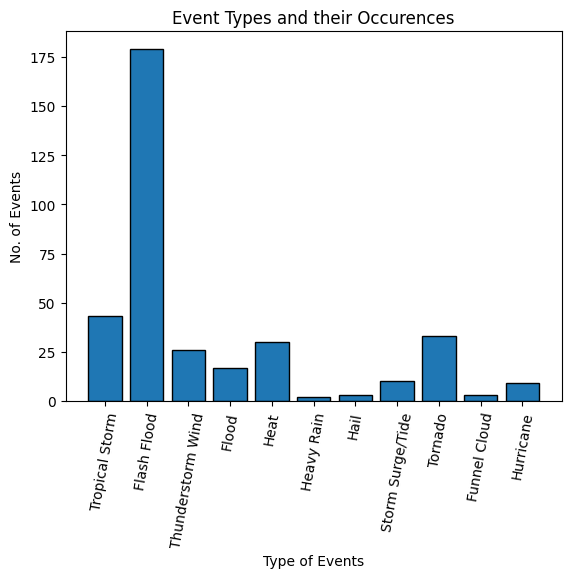

In [12]:
plt.bar(event_cats, event_cats_count, edgecolor = 'black')
plt.title('Event Types and their Occurences')
plt.xlabel('Type of Events')
plt.ylabel('No. of Events')

plt.xticks(rotation=80) # Rotation of the bars names
plt.show()

## Figure of Event Locations
Below are the locations of events in the two states. The size of marker depends upon the property cost of the
event.
### Begin Locations

In [237]:
start_df = harvey_top[['State', 'Begin_Lat', 'Begin_Lon', 'Property_Cost']].dropna().reset_index()
start_df.drop('index', axis=1, inplace=True)
start_df['Text'] = start_df['State'] + '<br>Property Cost ' + (start_df['Property_Cost']).astype(str)
start_df.head()

,State,Begin_Lat,Begin_Lon,Property_Cost,Text
0,TEXAS,31.5285,-106.1346,0.0,TEXAS<br>Property Cost 0.0
1,TEXAS,31.7715,-106.5028,0.0,TEXAS<br>Property Cost 0.0
2,TEXAS,31.7839,-106.5205,0.0,TEXAS<br>Property Cost 0.0
3,TEXAS,29.7585,-93.9153,600000000.0,TEXAS<br>Property Cost 600000000.0
4,TEXAS,30.9235,-94.5992,85000000.0,TEXAS<br>Property Cost 85000000.0


In [238]:
top_two = list(start_df['State'].unique())
top_two

['TEXAS', 'LOUISIANA']

In [239]:
colors = ['#E58606', '#5D69B1']

In [242]:
fig = go.Figure()

for state in top_two:

    st = start_df[(start_df['State']) == state]


    fig.add_trace(go.Scattergeo(
        locationmode= 'USA-states',
        lon = st['Begin_Lon'],
        lat = st['Begin_Lat'],
        text = st['Text'],
        marker=dict(    
            size = start_df['Property_Cost']/(10**8.6)+3, #6,
            color = colors[top_two.index(state)],
            line_color = 'rgb(40,40,40)',
            line_width = 0.2,
            sizemode = 'diameter'),
        name = state
    ))

fig.update_layout(
showlegend = True,
title = 'Events Began From these Locations<br>(Hover for details)',
geo = dict(scope = 'usa',
projection_type='albers usa',
landcolor = 'rgb(250,250,250)',
subunitcolor = "rgb(200, 200, 200)",
countrycolor = "rgb(217, 217, 217)",
countrywidth = 0.5,
subunitwidth = 0.5
)   
)

fig.show()

### End Locations

In [243]:
end_df = harvey_top[['State', 'End_Lat', 'End_Lon', 'Property_Cost']].dropna().reset_index()
end_df.drop('index', axis=1, inplace=True)
end_df['Text'] = start_df['State'] + '<br>Property Cost ' + (end_df['Property_Cost']).astype(str)
end_df.head()

,State,End_Lat,End_Lon,Property_Cost,Text
0,TEXAS,31.5183,-106.1176,0.0,TEXAS<br>Property Cost 0.0
1,TEXAS,31.7715,-106.5028,0.0,TEXAS<br>Property Cost 0.0
2,TEXAS,31.7573,-106.4989,0.0,TEXAS<br>Property Cost 0.0
3,TEXAS,29.6142,-94.3451,600000000.0,TEXAS<br>Property Cost 600000000.0
4,TEXAS,31.2083,-93.5815,85000000.0,TEXAS<br>Property Cost 85000000.0


In [244]:
fig = go.Figure()

for state in top_two:

    st = end_df[(end_df['State']) == state]


    fig.add_trace(go.Scattergeo(
        locationmode= 'USA-states',
        lon = st['End_Lon'],
        lat = st['End_Lat'],
        text = st['Text'],
        marker=dict(    
            size = end_df['Property_Cost']/(10**8.6)+3, #6,
            color = colors[top_two.index(state)],
            line_color = 'rgb(40,40,40)',
            line_width = 0.2,
            sizemode = 'diameter'),
        name = state
    ))

fig.update_layout(
showlegend = True,
title = 'Events Ended at These Locations<br>(Hover for details)',
geo = dict(scope = 'usa',
projection_type='albers usa',
landcolor = 'rgb(250,250,250)',
subunitcolor = "rgb(200, 200, 200)",
countrycolor = "rgb(217, 217, 217)",
countrywidth = 0.5,
subunitwidth = 0.5
)   
)

fig.show()

# Analysis

## Three Counties with Most Events in Texas
Below are given the top 3 Counties in Texas which encountered the most number of events during Harvey.

In [245]:
state_1 = harvey_top[harvey_top['State'] == 'TEXAS']
state_1.head()

,EpisodeID,Event_ID,State,Year,Month,Event_Type,CZ_Name,Begin_Date_Time,Timezone,End_Date_Time,...,Damage_Property,Property_Cost,Damage_Crops,Crop_Cost,Begin_Lat,Begin_Lon,End_Lat,End_Lon,Episode_Narrative,Event_Narrative
33599,119753,723472,TEXAS,2017,August,Tropical Storm,MONTGOMERY,2017-08-25 12:00:00,CST-6,2017-08-30 00:00:00,...,7.00B,7.000000e+09,NaN,NaN,NaN,NaN,NaN,NaN,Harvey made landfall as a category 4 hurricane...,Tropical Storm Harvey brought heavy rains and ...
34851,119753,723473,TEXAS,2017,August,Tropical Storm,FORT BEND,2017-08-26 00:00:00,CST-6,2017-08-30 00:00:00,...,8.00B,8.000000e+09,NaN,NaN,NaN,NaN,NaN,NaN,Harvey made landfall as a category 4 hurricane...,Harvey made landfall as a category 4 hurricane...
35115,119753,723449,TEXAS,2017,August,Tropical Storm,GALVESTON,2017-08-25 12:00:00,CST-6,2017-08-30 00:00:00,...,10.00B,1.000000e+10,NaN,NaN,NaN,NaN,NaN,NaN,Harvey made landfall as a category 4 hurricane...,Galveston County experienced catastrophic floo...
35116,119753,723474,TEXAS,2017,August,Tropical Storm,SAN JACINTO,2017-08-25 12:00:00,CST-6,2017-08-30 00:00:00,...,350.00M,3.500000e+08,NaN,NaN,NaN,NaN,NaN,NaN,Harvey made landfall as a category 4 hurricane...,Slow moving Tropical Storm Harvey produced ver...
35580,119753,723475,TEXAS,2017,August,Tropical Storm,WALKER,2017-08-25 12:00:00,CST-6,2017-08-30 00:00:00,...,600.00M,6.000000e+08,NaN,NaN,NaN,NaN,NaN,NaN,Harvey made landfall as a category 4 hurricane...,Slow moving Tropical Storm Harvey produced tor...


In [246]:
county_top = state_1.groupby('CZ_Name').size()
county_top = county_top.sort_values(ascending= False)
county_top = county_top[:3]
county_top

CZ_Name
HARRIS       21
GALVESTON    17
FORT BEND    13
dtype: int64

## Three Counties with Most Events in Louisiana
Below are given the top 3 Counties in Louisiana which encountered the most number of events during Harvey.

In [247]:
state_2 = harvey_top[harvey_top['State'] == 'LOUISIANA']
county_top2 = state_2.groupby('CZ_Name').size()
county_top2 = county_top2.sort_values(ascending= False)
county_top2 = county_top2[:3]
county_top2

CZ_Name
NATCHITOCHES    21
SABINE          15
RED RIVER        9
dtype: int64

## Three Counties with Highest Property Cost in Texas
The counties with most property cost in Texas are given below.

In [248]:
county1_property = state_1.groupby('CZ_Name')['Property_Cost'].agg('sum', 'count')
county1_property = county1_property.sort_values(ascending=False )
county1_property = county1_property[:3]
county1_property

CZ_Name
GALVESTON     2.000020e+10
FORT BEND     1.600433e+10
MONTGOMERY    1.400000e+10
Name: Property_Cost, dtype: float64

## Three Counties with Highest Property Cost in Louisiana
The counties with most property cost in Louisiana are given below.


In [249]:
county2_property = state_2.groupby('CZ_Name')['Property_Cost'].agg('sum', 'count')
county2_property = county2_property.sort_values(ascending=False )
county2_property = county2_property[:3]
county2_property

CZ_Name
CALCASIEU     60000000.0
BEAUREGARD    15000000.0
ACADIA          200000.0
Name: Property_Cost, dtype: float64

# Conclusions and Recommendations
The Most Affected states were Texas and Louisiana and hence the company should focus on these states firstly to send people to. However, the property cost to the counties in Texas was relatively muh higher than that to the Louisiana and can be seen that the property cost of Calcasieu of Louisiana was lower than Montgomery of Texas, which means the company should be prioritising Texas over. We may also note that there may be other counties in Texas too which had higher damage than Calcasieu of Louisiana which the company should look into too. 
It is also clearly visible from the plots that the events did most damage at the coastal regions and the most affected areas are not much far from each other.